In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
cd ~/Documents/repos/coding/vocalpy/scipy-proceedings-2023-vak

/home/pimienta/Documents/repos/coding/vocalpy/scipy-proceedings-2023-vak


In [3]:
RESULTS_ROOT = pathlib.Path('./results/BFSongRepo/all-birds/ED_TCN/results_230707_125523')

In [4]:
events_paths = sorted(RESULTS_ROOT.glob('train_dur*/replicate*/lightning_logs/version_0/events*'))
events_paths = [events_path for events_path in events_paths if 'train_dur_900' in str(events_path)]

In [5]:
import vak

/home/pimienta/miniconda3/envs/vak-scipy-proceedings/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
data = []
for events_path in events_paths:
    df = vak.common.tensorboard.events2df(events_path)
    df['replicate'] = int(events_path.parents[-8].name.split('_')[-1])
    data.append(df)

data = pd.concat(data)

In [10]:
data['val_loss_step_smooth'] = data['val_loss_step'].rolling(3).mean()

In [17]:
data = data.reset_index()

Text(0.5, 0, 'Training step')

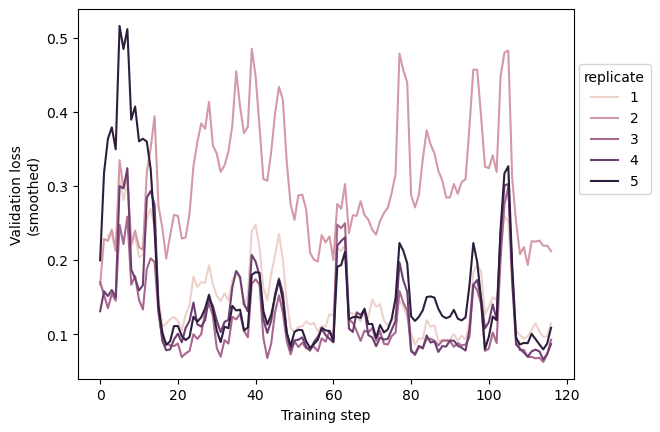

In [25]:
import seaborn as sns


g = sns.lineplot(
    data=data,
    x='step',
    y='val_loss_step_smooth',
    hue='replicate'
)
sns.move_legend(g, loc=[1.01, 0.5])
g.axes.set_ylabel("Validation loss\n(smoothed)")
g.axes.set_xlabel("Training step")

<Axes: xlabel='step', ylabel='val_loss_step'>

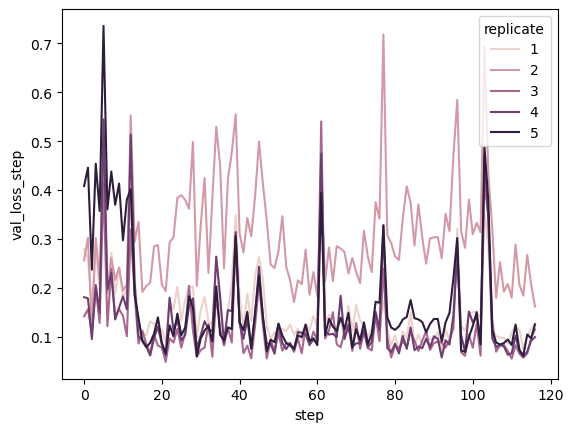

In [30]:
import seaborn as sns


sns.lineplot(
    data=data,
    x='step',
    y='val_loss_step',
    hue='replicate'
)